### Math 53: Differential Equations with Linear Algebra, Prof. Jack Poulson
### Introduction to Fourier Series
<img src="./Legendre_and_Fourier.jpg" width="40%">

#### Introduction to Fourier Series
One of the most powerful tools that we have discussed so far is the use of an eigenvalue decomposition, say,
$$
A = X \, \Lambda\, X^{-1},
$$
to compute
$$
p(A) = X \, p(\Lambda)\, X^{-1}
$$
for any polynomial $p$, and, by extension,
$$
f(A) = X \,f(\Lambda)\, X^{-1},
$$
for functions $f(A)$ that satisfy certain technical properties beyond the scope of this course (though, for example, $\exp$, $\sin$, $\cos$, and square-root are all allowed). Since a matrix is simply a representation of a finite-dimensional linear operator, and a derivative is a linear operator, it is natural to ask if an analogous decomposition exists for the derivative operator. We will see that Fourier series provide an analogue of the spectral decomposition for normal matrices,
$$
A = Q \Lambda Q^H,
$$
where $Q$ is a unitary matrix and $\Lambda$ is a (complex) diagonal matrix of eigenvalues, where $A$ is the derivative operator and computing the coefficients of the Fourier transform is analogous to applying $Q^H$.

#### Exponentials as eigenfunctions of the derivative operator
Recall that, for any real or imaginary constant $\alpha$,
$$
\frac{d}{dt} \left[ \exp(\alpha t) \right] = \alpha \exp(\alpha t),
$$
and so we may regard $\exp(\alpha t)$ as an analogue of an eigenvector of the derivative operator with an eigenvalue of $\alpha$; such a function is frequently called an **eigenfunction**. Similarly, we have that
$$
\frac{d^n}{dt^n} \left[ \exp(\alpha t) \right] = \alpha^n \exp(\alpha t),
$$
and so
$$
p(\frac{d}{dt}) \exp(\alpha t) = p(\alpha) \exp(\alpha t)
$$
for any polynomial $p$. Perhaps more surprisingly, we could then define
$$
(\frac{d}{dt})^{1/2} \exp(\alpha t) = \alpha^{1/2} \exp(\alpha t),
$$
which, if applied twice to $\exp(\alpha t)$, yields the standard derivative.

The most natural way to extend these techniques from exponentials to more general classes of functions is to work with functions which can be decomposed as a linear combination of exponentials; the surprising fact is that exponentials can in fact form an **orthonormal basis** if one chooses the various values of $\alpha$ to lie at (appropriately) equally spaced points along the imaginary axis. But defining the sense in which functions can be orthogonal (and normalized to have "length" one) requires discussion first.

#### Inner products of functions
Let us consider two functions, $f(t)$ and $g(t)$, with $t$ restricted to some interval $[a,b)$. Then we may define the **inner product** of $f$ and $g$ (with respect to the interval $[a,b)$) as
$$
(f,g) = \int_a^b \bar{f}(t) g(t)\,dt,
$$
where it is important to note that $f$ is complex-conjugated within the integral. While this may seem strange, if the integral was approximated with a Riemann sum with 10 boxes, the approximation would be equivalent to $\mathrm{f}^H \mathrm{g}$ for vectors $\mathrm{f}$ and $\mathrm{g}$ (each of length ten) formed by sampling $f(t)$ and $g(t)$ once in each of the ten boxes. Thus, as the number of boxes goes to infinity, we can see that the integral is the appropriate generalization of the usual vector inner product.

Using this definition of an inner product, we can then say that $f$ and $g$ are **orthogonal** if $(f,g)=0$, and that $f$ is **normalized** if $(f,f)=1$. A set of functions $(f_j)_{j=1}^n$ is then **orthonormal** if $(f_i,f_j)$ is equal to zero when $i \neq j$ and one when $i=j$.

#### An orthonormal basis of exponentials
Consider the functions $f(t)=\exp(i mt)$ and $g(t)=\exp(i n t)$, for integers $m$ and $n$, with $t$ restricted to the interval $[0,2\pi)$. Then
$$
(f,g) = \int_0^{2\pi} \exp(-i m t) \exp(i n t)\, dt = \int_0^{2\pi} \exp(i(n-m)t)\,dt.
$$
If n=m, then $(f,g)=2\pi$, otherwise, integration by parts yields
$$
(f,g) = \frac{1}{i(n-m)} \left[\exp(i(n-m)t)\right]_0^{2\pi},
$$
which must be zero since we have assumed that $n-m$ is an integer. Thus, the family
$$
\frac{1}{\sqrt{2\pi}} \exp(i n t),\;\; n=-\infty,...,-1,0,1,...,\infty,
$$
is **orthonormal**, and each is an eigenfunction of the derivative with eigenvalue $i n$.

The proof is beyond the scope of this course, but it is possible to decompose *all* $2\pi$-periodic functions with a finite number of discontinuities in such a manner. Furthermore, for a general period of $L$, it is straight-forward to verify that the appropriate generalization of the above family of orthonormal functions is
$$
\frac{1}{\sqrt{L}} \exp(i n \frac{2\pi}{L}t),\;\;n=-\infty,...,-1,0,1,...,\infty.
$$

A **Fourier series** representation of a periodic function $f(t)$ (with period $L$) is thus its expression as a linear combination of the orthonormal basis functions; that is
$$
\tilde{f}(t) = \sum_{k=-\infty}^\infty C_k (\frac{1}{\sqrt{L}} \exp(i k \frac{2\pi}{L}t)).
$$
Since the basis functions are orthonormal, given an expression for $f(t)$, one simply needs to evaluate the integral in the expression
$$
C_k = (\frac{1}{\sqrt{L}}\exp(i k \frac{2\pi}{L} t),f) = \frac{1}{\sqrt{L}} \int_0^L \exp(-i k \frac{2\pi}{L} t) f(t)\, dt
$$
in order to find each $C_k$.

#### Example: Fourier series of a sawtooth wave
Consider the *sawtooth wave* with period $2 \pi$,
$$
f(t) = t, \;\; 0 \le t < 2 \pi,
$$
which has a single discontinuity at 0.

(0, 18.84955592153876)

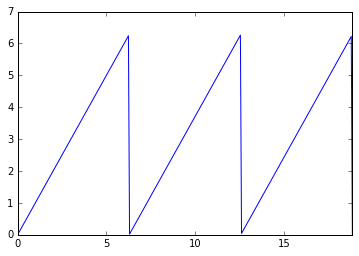

In [1]:
%matplotlib inline
from math import pi
import numpy as np
import matplotlib.pyplot as plt

numPoints = 300
XRepeated=np.linspace(0,6*pi,num=numPoints)

def sawtooth(t):
    return t % (2*pi)

YRepeated=np.zeros(numPoints)
for i in xrange(numPoints):
    YRepeated[i] = sawtooth(XRepeated[i])
    
plt.plot(XRepeated,YRepeated)
plt.xlim(0,6*pi)

We can easily compute its Fourier series,
$$
\tilde{f}(t) = \sum_{k=-\infty}^\infty C_k \left( \frac{1}{\sqrt{2 \pi}} \exp(i k t) \right),
$$
as the orthonormality of the basis functions $\exp(i k t)/\sqrt{2 \pi}$ implies that
$$
C_m = (\frac{1}{\sqrt{2\pi}}\exp(imt),f) = \frac{1}{\sqrt{2\pi}} \int_0^{2\pi} \exp(-i m t) f(t) \,dt = \frac{1}{\sqrt{2\pi}} \int_0^{2\pi} \exp(-i m t) t \,dt.
$$
When $m=0$, we have that
$$
C_0 = \pi \sqrt{2 \pi},
$$
otherwise, integration by parts yields
$$
C_m = \frac{i \sqrt{2 \pi}}{m},
$$
and so
$$
\tilde{f}(t) = \pi + \sum_{k=1}^\infty (\frac{i}{k} \exp(i k t) + \frac{i}{-k} \exp(-i k t)).
$$
Euler's formula then implies that
$$
\tilde{f}(t) = \pi - 2 \sum_{k=1}^\infty \frac{\sin(kt)}{k}.
$$

The visualizations below demonstrate the partial summation
$$
\tilde{f}_n(t) = \pi - 2 \sum_{k=1}^n \frac{\sin(kt)}{k}
$$
for increasing values of $n$.

<function __main__.plot_approx>

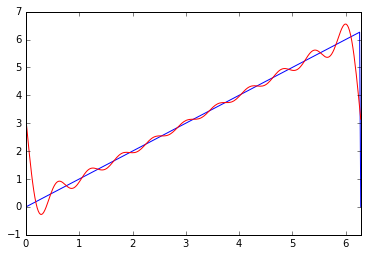

In [2]:
from math import sin
from cmath import exp
from ipywidgets import interact, fixed
import ipywidgets as widgets

numPoints=300
X=np.linspace(0,2*pi,num=numPoints)

def sawtooth_approx(t,n):
    approx = pi
    for k in xrange(1,n+1):
        approx = approx - 2*sin(k*t)/k
    return approx

Y=np.zeros(numPoints)
for i in xrange(numPoints):
    Y[i] = sawtooth(X[i])

YApprox=np.zeros(numPoints)
def plot_approx(n=10):
    for i in xrange(numPoints):
        YApprox[i] = sawtooth_approx(X[i],n)
    plt.plot(X,Y,'b-',X,YApprox,'r-')
    plt.xlim(0,2*pi)

interact(plot_approx,n=widgets.IntSlider(min=0,max=100,step=1,value=10))

<IPython.core.display.Javascript object>


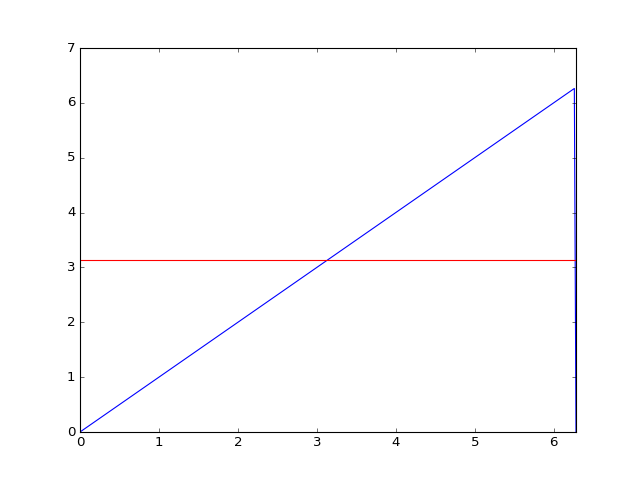

In [3]:
%matplotlib notebook
plot_approx(n=0)

<IPython.core.display.Javascript object>


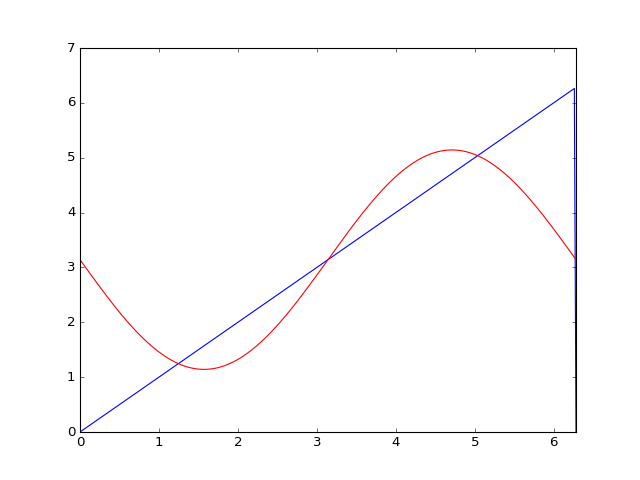

In [4]:
plot_approx(n=1)

<IPython.core.display.Javascript object>


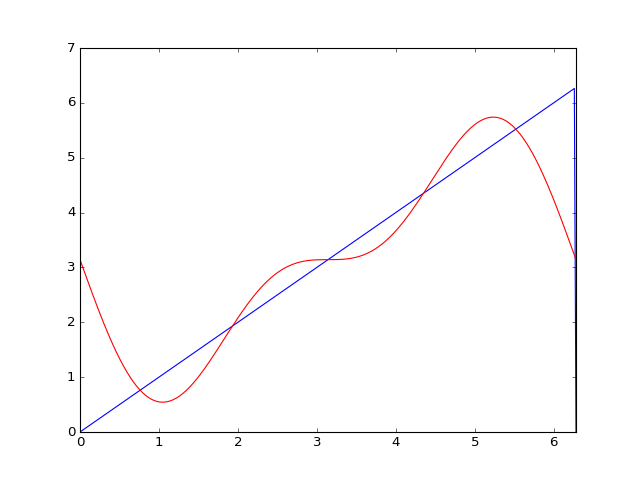

In [5]:
plot_approx(n=2)

<IPython.core.display.Javascript object>


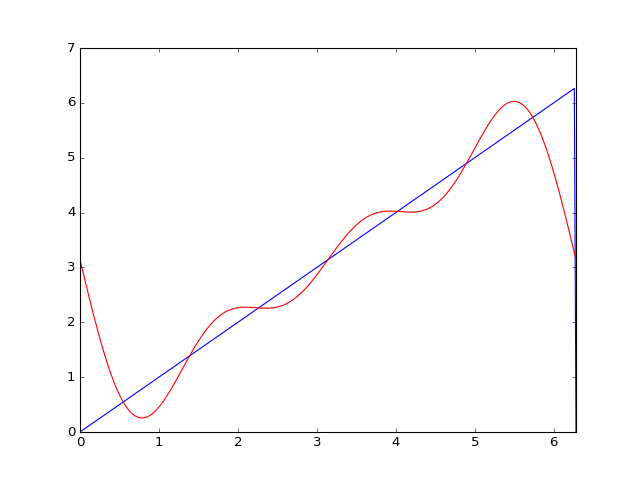

In [6]:
plot_approx(n=3)

<IPython.core.display.Javascript object>


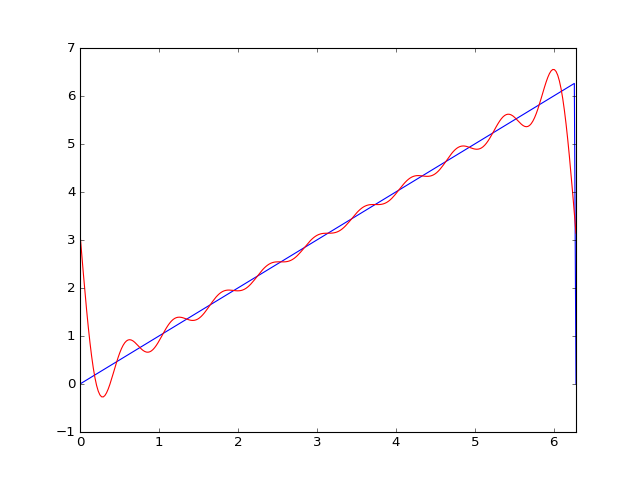

In [7]:
plot_approx(n=10)

<IPython.core.display.Javascript object>


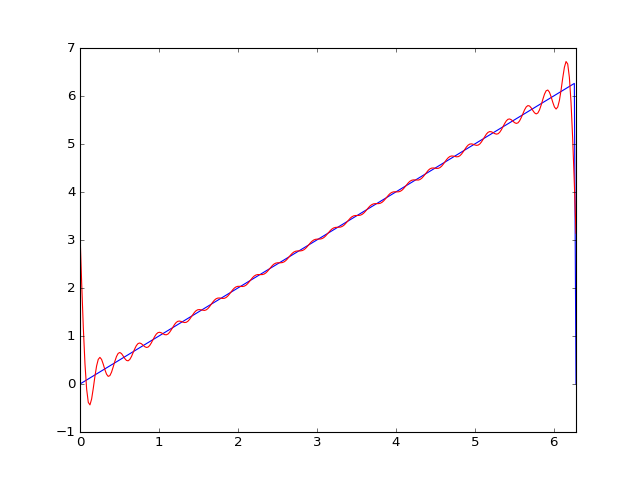

In [8]:
plot_approx(n=25)

<IPython.core.display.Javascript object>


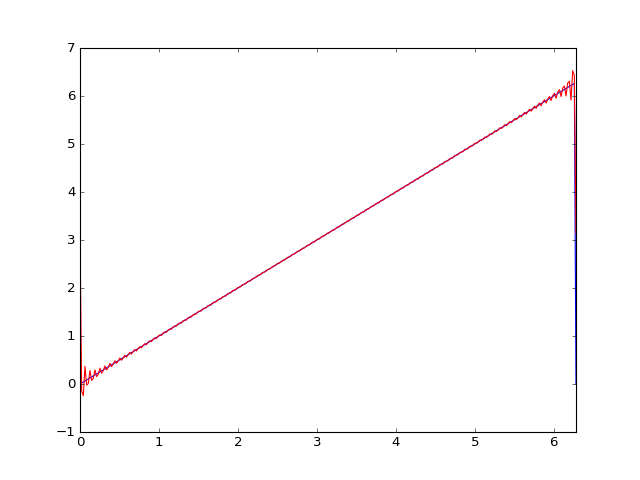

In [9]:
plot_approx(n=100)

Similarly, we can approximate the fractional derivatives of the sawtooth wave by naively truncating a modification of the Fourier series which takes the fractional derivative of each term:
$$
(\frac{d}{dt})^\alpha \tilde{f}(t) = \sum_{k=-\infty}^\infty (i k)^\alpha C_k (\frac{1}{\sqrt{2\pi}}\exp(i k t)).
$$
The one technicality arises from the treatment of $\exp(i k t)$ when $k=0$; our naive approximation only matches the original function if we replace $k=0$ with a very small value of $k$.

<function __main__.plot_approx_genderiv>

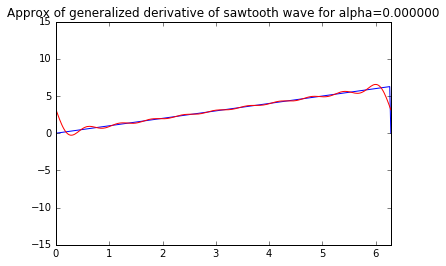

In [10]:
%matplotlib inline
def sawtooth_approx_genderiv(t,n,alpha,k0=0.0000001):
    approx = (1j*k0)**alpha * pi*exp(1j*k0*t)
    for k in xrange(1,n+1):
        ikPow = (1j*k)**alpha
        ikNegPow = (-1j*k)**alpha
        approx = approx + (1j/k)*(ikPow*exp(1j*k*t)-ikNegPow*exp(-1j*k*t))
    return approx.real

YGenDeriv=np.zeros(numPoints)
def plot_approx_genderiv(n=10,alpha=1,xmin=0,xmax=2*pi,ymin=-15,ymax=15):
    for i in xrange(numPoints):
        YGenDeriv[i] = sawtooth_approx_genderiv(X[i],n,alpha)
    plt.plot(X,Y,'b-',X,YGenDeriv,'r-')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    tString = "Approx of generalized derivative of sawtooth wave for alpha=%f" % alpha
    plt.title(tString)

# Note; Negative derivatives need to be further investigated
interact(plot_approx_genderiv,k=widgets.IntSlider(min=0,max=100,step=1,value=10),alpha=widgets.FloatSlider(min=0,max=1,step=0.01,value=0))

<IPython.core.display.Javascript object>


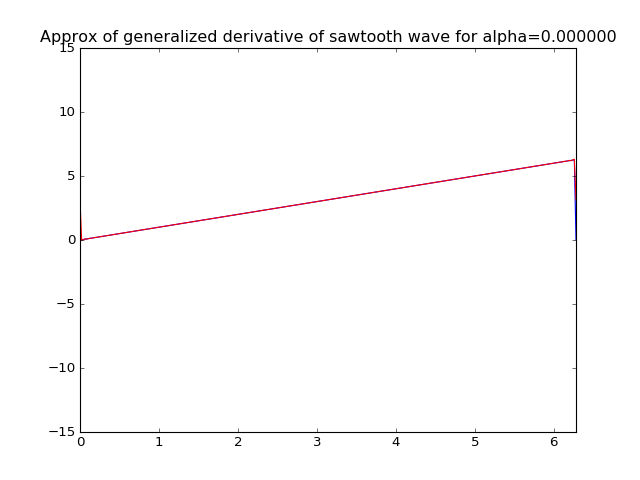

In [11]:
%matplotlib notebook
plot_approx_genderiv(n=1000,alpha=0)

<IPython.core.display.Javascript object>


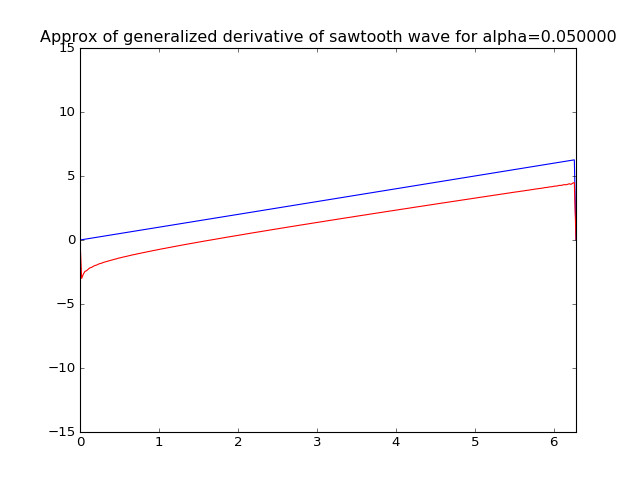

In [12]:
plot_approx_genderiv(n=1000,alpha=0.05)

<IPython.core.display.Javascript object>


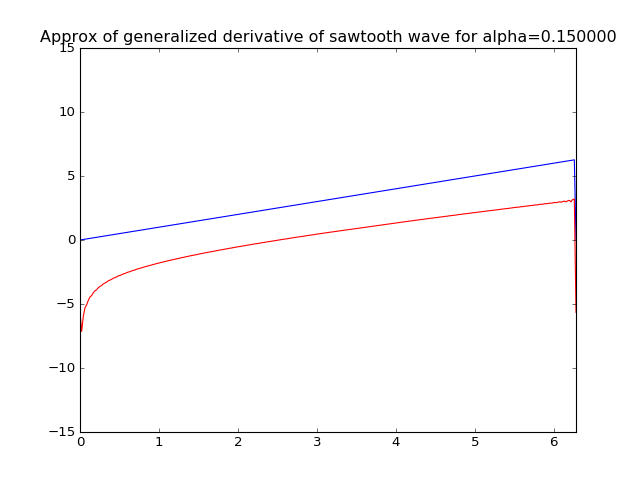

In [13]:
plot_approx_genderiv(n=1000,alpha=0.15)

<IPython.core.display.Javascript object>


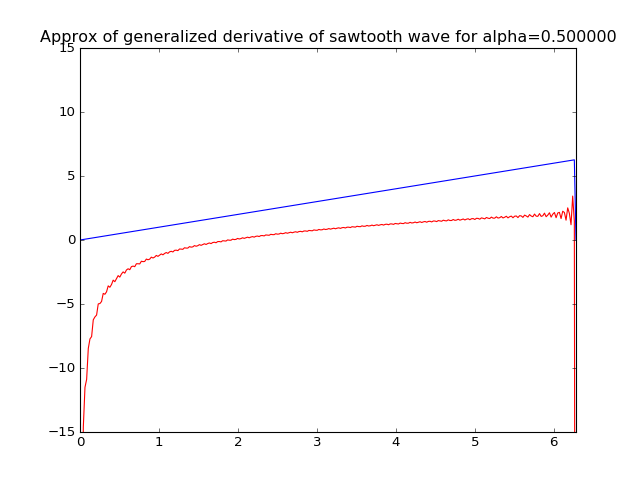

In [14]:
plot_approx_genderiv(n=1000,alpha=0.5)

<IPython.core.display.Javascript object>


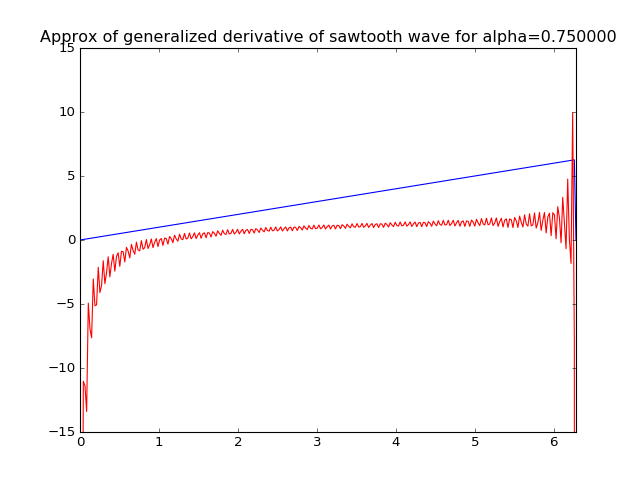

In [15]:
plot_approx_genderiv(n=1000,alpha=0.75)

<IPython.core.display.Javascript object>


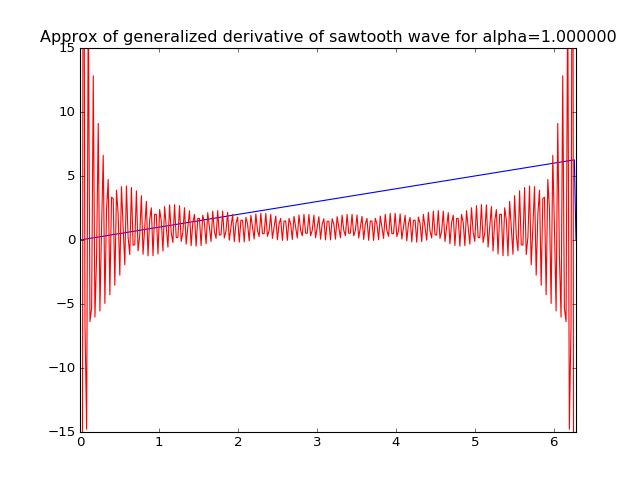

In [16]:
plot_approx_genderiv(n=1000,alpha=1)

### Solving the Heat Equation with Fourier Series
As part of his work on his revolutionary manuscript, *The Analytic Theory of Heat*, Joseph Fourier introduced Fourier series as a means of efficiently modeling the change in temperature of a highly conductive material. In particular, the **heat equation** for the temperature $u(x,t)$ of a 1D material, where $x$ is 1D position and $t$ is time, is given by the **Partial Differential Equation**
$$
\frac{\partial u}{\partial t} = \beta \frac{\partial^2 u}{\partial x^2},
$$
for some positive, material-dependent constant $\beta$. The general form of this equation is then consistent with the notion that temperatures should increase in a region surrounded by hotter material (a local minimum) and decrease in a region surrounded by cooler material (a local maximum). 

#### The separable ansatz
Let us make use of the **ansatz** that $u(x,t)$ is **separable** in $x$ and $t$, i.e.,
$$
u(x,t) = X(x) T(t),
$$
so that the PDE becomes
$$
X(x) T'(t) = \beta X''(x) T(t).
$$
We can then easily arrange the equation into the form
$$
\frac{T'(t)}{\beta T(t)} = \frac{X''(x)}{X(x)} = C_0
$$
for some constant $C_0$ (which we know is constant because it cannot be a function of either $x$ or $t$). Then we arrive at the two equations

\begin{align*}
T'(t) - C_0 \beta T(t) &= 0, \\
X''(x) - C_0 X(x) &= 0.
\end{align*}

It becomes convenient to define $C_0=-\lambda^2$ (which does **not** assume that $C_0$ is positive since $\lambda$ could be complex) so that

\begin{align*}
T'(t) + \lambda^2 \beta T(t) &= 0, \\
X''(x) + \lambda^2 X(x) &= 0,
\end{align*}

which has solutions

\begin{align*}
T(t) &= C_1 \exp(-\lambda^2 \beta t),\\
X(x) &= C_2 \exp(i \lambda x) + C_3 \exp(-i \lambda x).
\end{align*}

Thus
$$
u(x,t) = X(x) T(t) = (C_4 \exp(i \lambda x) + C_5 \exp(-i \lambda x)) \exp(-\lambda^2 \beta t).
$$
For our purposes, we will see that we will only need the first term and will make use of linear combinations (for different values of $\lambda$) of
$$
u(x,t) = \exp(i \lambda x) \exp(-\lambda^2 \beta t).
$$

#### Solving a heat equation
Now consider a 1D rod of length $\pi$ whose endpoints are permanently held at a temperature of zero Celcius but whose initial temperature distribution at time $t=0$ is
$$
u(x,0)=\left\{\begin{array}{c} x,\;\;0 \le x < \pi/2 \\ pi - x,\;\;\pi/2 \le x < \pi \end{array}\right..
$$

<IPython.core.display.Javascript object>


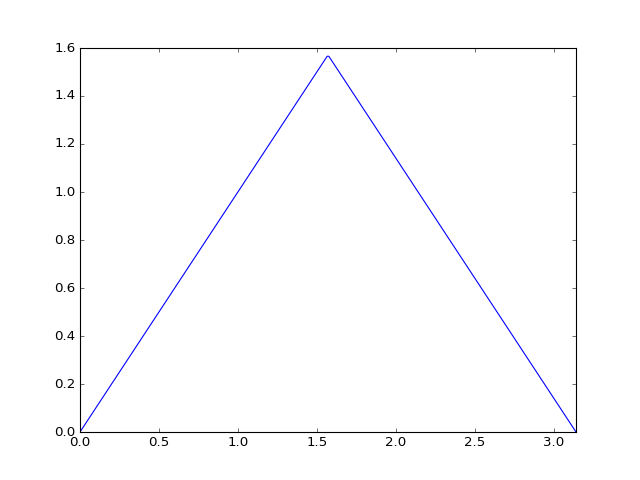

(0, 3.141592653589793)

In [17]:
def hat(x):
    if x <= pi/2:
        return x
    else:
        return pi-x
    
numPoints = 300
X=np.linspace(0,pi,num=numPoints)

Y=np.zeros(numPoints)
for i in xrange(numPoints):
    Y[i] = hat(X[i])
    
plt.plot(X,Y)
plt.xlim(0,pi)

While it would be tempting to make use of a Fourier series over the interval $[0,\pi)$, not all periodic functions on 
$[0,\pi)$ satisfy the boundary conditions that $u(0,t)=u(\pi,t)=0$ for all time (this is the condition that the temperatures of the ends of the rod must remain zero). However, if we consider an odd extension of the original problem onto $[-\pi,\pi)$, then no $\cos$ terms could survive in the Fourier series and we could find the representation
$$
\tilde{u}(x,0) = \sum_{k=0}^\infty A_k \sin(k x),\;\; -\pi \le x \le \pi,
$$
and it is straight-forward to verify that, for our problem,
$$
A_k = \frac{1}{\pi} \int_{-\pi}^\pi \sin(k x) u(x,0) dx = \frac{2}{\pi} \int_0^\pi \sin(k x) u(x,0) dx.
$$
Substituting the definition of $u(x,0)$, we find that
$$
\tilde{u}(x,0) = \frac{4}{\pi} \sum_{k=1}^\infty \frac{\sin(k\pi/2)}{k^2}\sin(kx),
$$
and we can easily verify that the sum converges towards the initial temperature distribution.

<function __main__.plot_hat_approx>

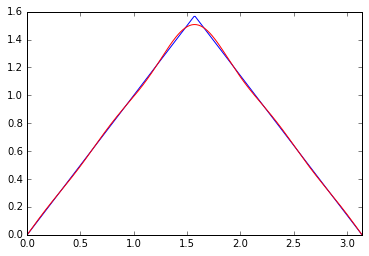

In [18]:
%matplotlib inline
def hat_approx(x,n=10):
    approx = 0
    for k in xrange(1,n+1):
        approx = approx + (4/(k*k*pi))*sin(k*pi/2)*sin(k*x)
    return approx

YApprox=np.zeros(numPoints)
def plot_hat_approx(n=10):
    for i in xrange(numPoints):
        YApprox[i] = hat_approx(X[i],n)
    plt.plot(X,Y,'b-',X,YApprox,'r-')
    plt.xlim(0,pi)

interact(plot_hat_approx,n=widgets.IntSlider(min=0,max=100,step=1,value=10))

<IPython.core.display.Javascript object>


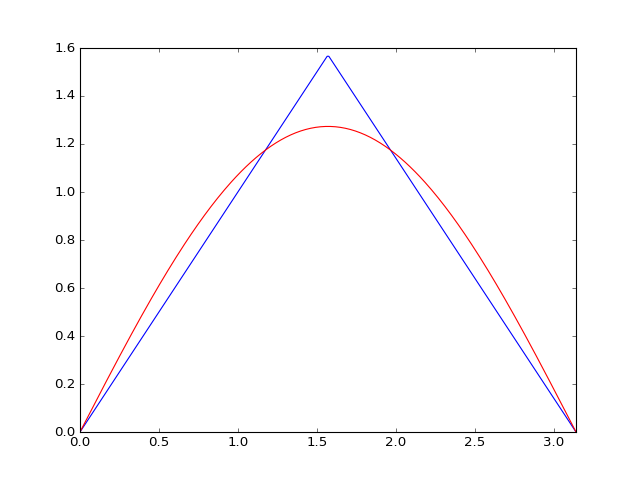

In [19]:
%matplotlib notebook
plot_hat_approx(n=1)

<IPython.core.display.Javascript object>


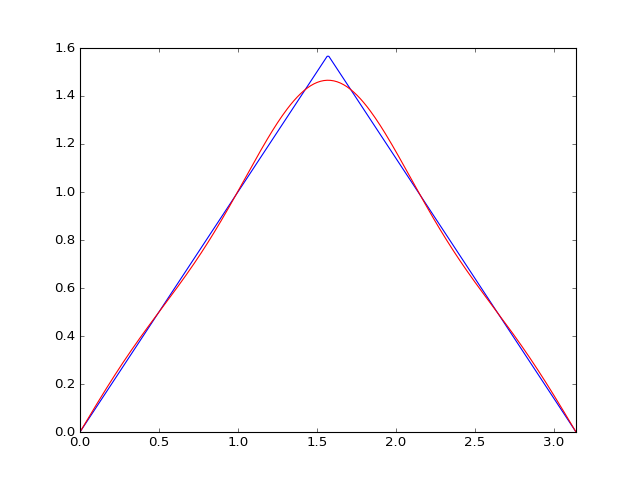

In [20]:
plot_hat_approx(n=5)

<IPython.core.display.Javascript object>


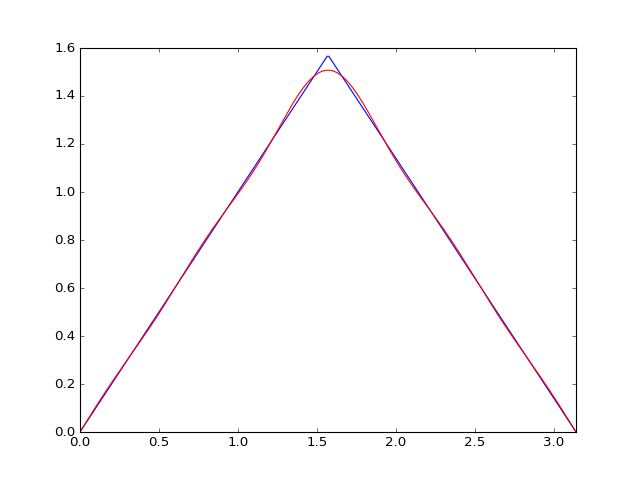

In [21]:
plot_hat_approx(n=10)

<IPython.core.display.Javascript object>


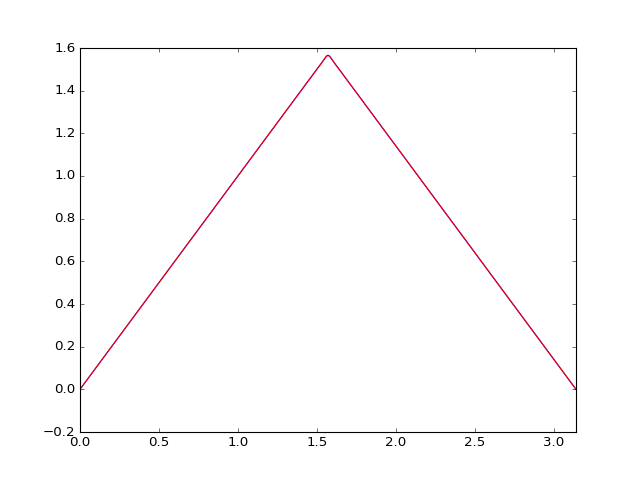

In [22]:
plot_hat_approx(n=100)

Since each of the terms in the above Fourier series satisfies the boundary conditions, they would each be the solution to a *different* initial condition,
$$ u(x,0) = \sin(kx), $$
namely
$$ u(x,t) = \sin(kx) \exp(-\beta k^2 t). $$
By linearity, the initial condition
$$ u(x,0) = \frac{4}{\pi} \sum_{k=1}^\infty \frac{\sin(k\pi/2)}{k^2}\sin(kx) $$
corresponds to the solution
$$ u(x,t) = \frac{4}{\pi} \sum_{k=1}^\infty \frac{\sin(k\pi/2)}{k^2}\sin(kx)\exp(-\beta k^2 t). $$
Approximations to this sum (keeping the first 100 terms) are demonstrated below for various values of time.

<function __main__.plot_hat_heat_approx>

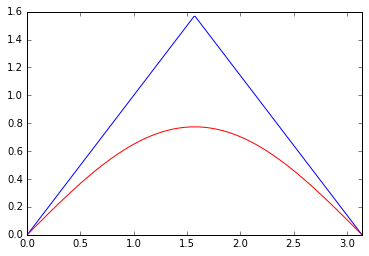

In [23]:
%matplotlib inline
import math

def hat_heat_approx(x,t,beta=1,n=10):
    approx = 0
    for k in xrange(1,n+1):
        approx = approx + (4./(k*k*pi))*sin(k*pi/2)*sin(k*x)*math.exp(-beta*k*k*t)
    return approx

YApprox=np.zeros(numPoints)
def plot_hat_heat_approx(t,beta=1,n=10):
    for i in xrange(numPoints):
        YApprox[i] = hat_heat_approx(X[i],t,beta,n)
    plt.plot(X,Y,'b-',X,YApprox,'r-')
    plt.xlim(0,pi)

interact(plot_hat_heat_approx,t=widgets.FloatSlider(min=0,max=7,step=0.1,value=0.5),n=widgets.IntSlider(min=0,max=100,step=1,value=10))

<IPython.core.display.Javascript object>


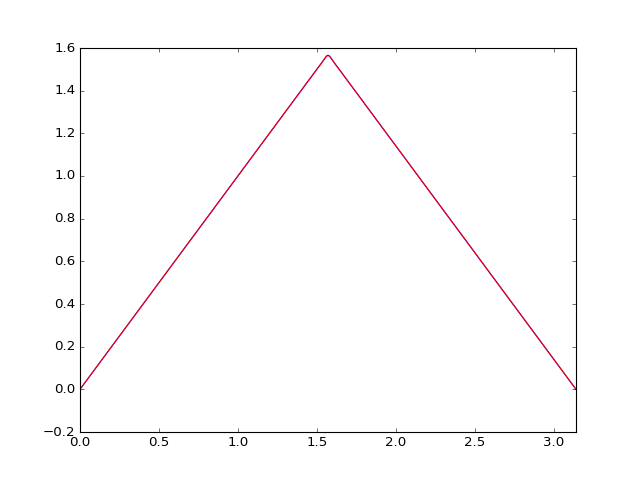

In [24]:
%matplotlib notebook
plot_hat_heat_approx(0,n=100)

<IPython.core.display.Javascript object>


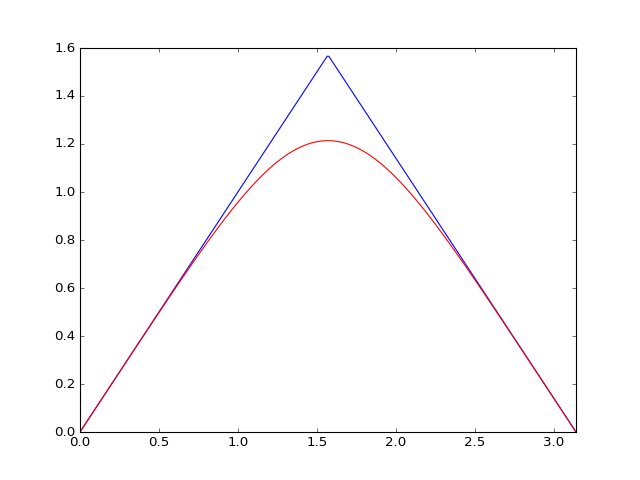

In [25]:
plot_hat_heat_approx(0.1,n=100)

<IPython.core.display.Javascript object>


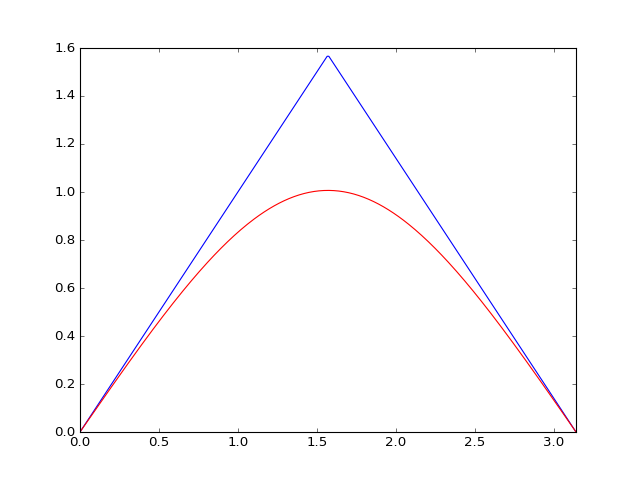

In [26]:
plot_hat_heat_approx(0.25,n=100)

<IPython.core.display.Javascript object>


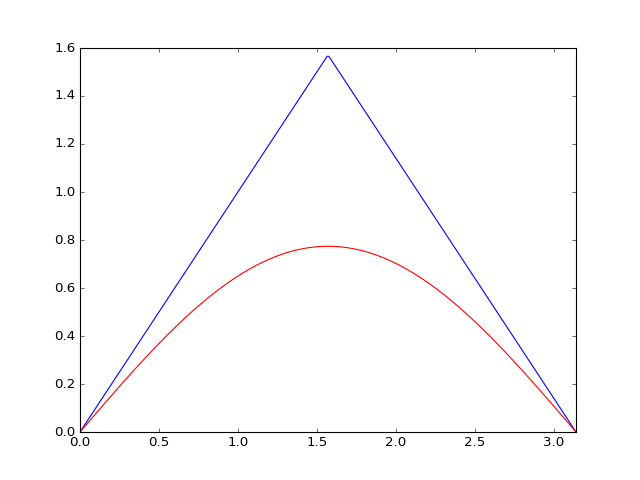

In [27]:
plot_hat_heat_approx(0.5,n=100)

<IPython.core.display.Javascript object>


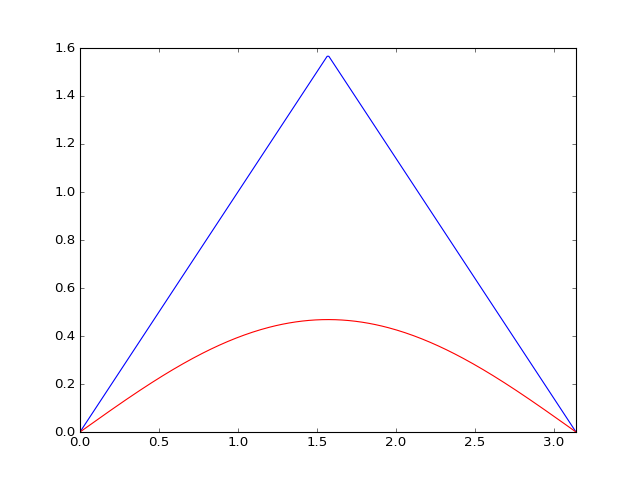

In [28]:
plot_hat_heat_approx(1.0,n=100)

<IPython.core.display.Javascript object>


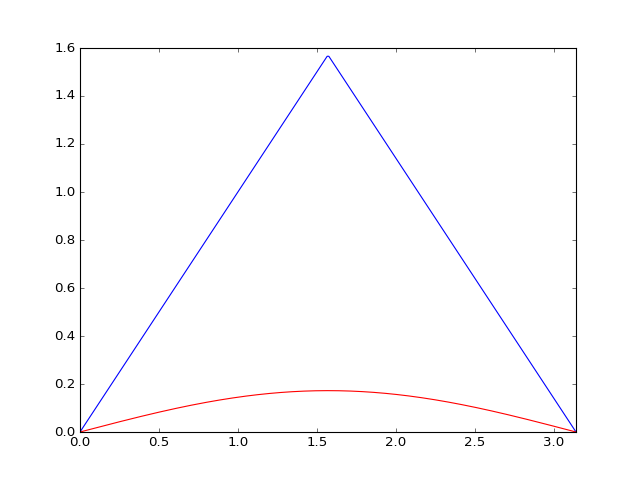

In [29]:
plot_hat_heat_approx(2.0,n=100)

<IPython.core.display.Javascript object>


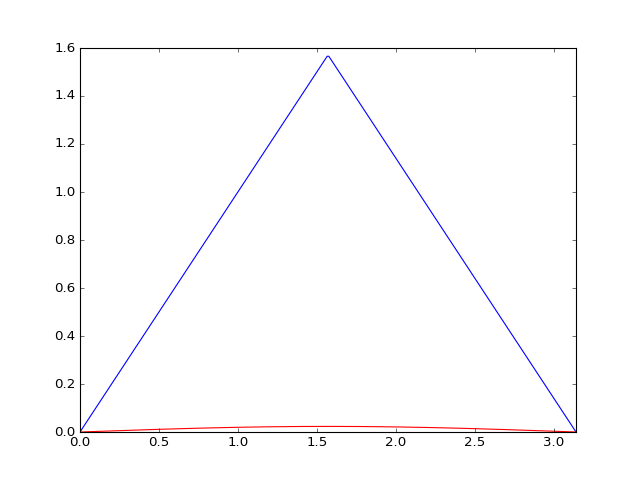

In [30]:
plot_hat_heat_approx(4.0,n=100)

### Solving Laplace's equation using Fourier series
**TODO**

#### Exercises

##### Problem 1
Compute the Fourier series of the square wave
$$
f(x) = \left\{\begin{array}{c} 1,\;\; 0 \le x < \pi,\\0,\;\; \pi \le x < 2 \pi \end{array}\right.
$$
and then plot three successively more accurate approximations.

#### Problem 2
Compute the inner product of $\sin(mx)$ and $\sin(nx)$ for two integers $n$ and $m$ over the interval $[0,2\pi)$, and then do the same for $\cos(mx)$ and $\cos(nx)$, and then for $\sin(mx)$ and $\cos(nx)$. Explain how to then form an orthonormal basis using these functions.

#### Problem 3
Compute the half derivative and half integral of the function
$$
f(t) = \exp(t) + 2 \exp(2t) + 10 \exp(-t),
$$
and then sketch both, as well as the original function, from $0 \le t < 1$. If an answer is complex, separately sketch its real and imaginary parts.

#### Problem 4
Solve the 2D Laplace equation over $[0,\pi) \times [0,\pi)$ with boundary conditions $u(0,y)$, $u(\pi,y)$, $u(x,0)$, and $u(x,\pi)$ each equal to a hat function with peak $1$.